In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('wpkr_wc_orders.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2 non-null      int64  
 1   status                2 non-null      object 
 2   currency              2 non-null      object 
 3   type                  2 non-null      object 
 4   tax_amount            2 non-null      float64
 5   total_amount          2 non-null      float64
 6   customer_id           2 non-null      int64  
 7   billing_email         2 non-null      object 
 8   date_created_gmt      2 non-null      object 
 9   date_updated_gmt      2 non-null      object 
 10  parent_order_id       2 non-null      int64  
 11  payment_method        2 non-null      object 
 12  payment_method_title  2 non-null      object 
 13  transaction_id        0 non-null      float64
 14  ip_address            2 non-null      object 
 15  user_agent            2 non

,id,status,currency,type,tax_amount,total_amount,customer_id,billing_email,date_created_gmt,date_updated_gmt,parent_order_id,payment_method,payment_method_title,transaction_id,ip_address,user_agent,customer_note
0,444,wc-processing,IDR,shop_order,0.0,38.0,1,admin@datamininguntan.my.id,2025-05-07 07:55:32,2025-05-07 07:55:33,0,cod,Cash on delivery,NaN,180.242.238.49,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1,446,wc-processing,IDR,shop_order,0.0,19.0,0,leoprangs@gmail.com,2025-05-07 08:03:40,2025-05-07 08:03:41,0,cod,Cash on delivery,NaN,180.242.238.49,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN


# Preprocessing

In [15]:
df2 = df.copy()

# Convert date columns to datetime format
df2["date_created_gmt"] = pd.to_datetime(df2["date_created_gmt"])
df2["date_updated_gmt"] = pd.to_datetime(df2["date_updated_gmt"])

# Fill missing values (Example: transaction_id)
# df2.loc[:, "transaction_id"] = df2["transaction_id"].astype(str).fillna("Unknown")
df2["transaction_id"] = df2["transaction_id"].astype("object").fillna("Unknown")

# Convert numeric columns
df2["tax_amount"] = pd.to_numeric(df2["tax_amount"], errors='coerce')
df2["total_amount"] = pd.to_numeric(df2["total_amount"], errors='coerce')

# Display cleaned df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2 non-null      int64         
 1   status                2 non-null      object        
 2   currency              2 non-null      object        
 3   type                  2 non-null      object        
 4   tax_amount            2 non-null      float64       
 5   total_amount          2 non-null      float64       
 6   customer_id           2 non-null      int64         
 7   billing_email         2 non-null      object        
 8   date_created_gmt      2 non-null      datetime64[ns]
 9   date_updated_gmt      2 non-null      datetime64[ns]
 10  parent_order_id       2 non-null      int64         
 11  payment_method        2 non-null      object        
 12  payment_method_title  2 non-null      object        
 13  transaction_id        2 

# Visualisasi

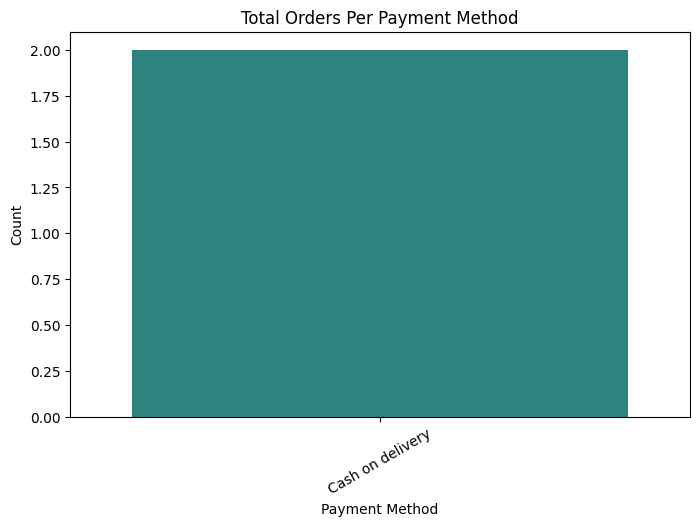

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x="payment_method_title", data=df, palette="viridis", hue="payment_method_title")
plt.title("Total Orders Per Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

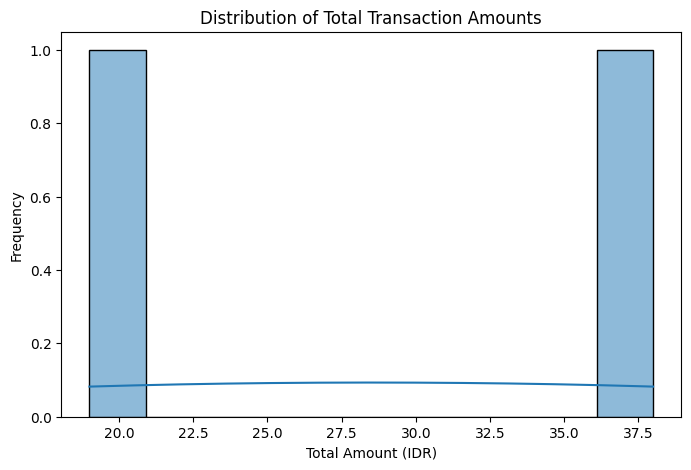

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df["total_amount"], bins=10, kde=True)
plt.title("Distribution of Total Transaction Amounts")
plt.xlabel("Total Amount (IDR)")
plt.ylabel("Frequency")
plt.show()

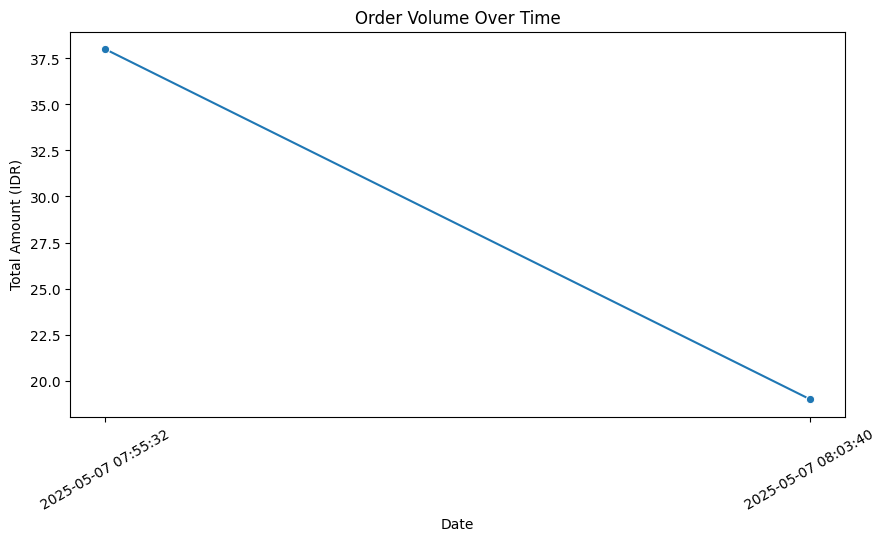

In [21]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="date_created_gmt", y="total_amount", data=df, marker="o")
plt.title("Order Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount (IDR)")
plt.xticks(rotation=30)
plt.show()

In [22]:
# export
df2.to_csv('orders.csv')